# Toy Two-Stage Learning Demo

This notebook demonstrates the two-stage learning experiment with small dimensions for rapid testing.

**Key Features:**
- Small input dimension (100 instead of 3072)
- Small MLP (3 layers: 256-128-64)
- Fast training (50 epochs, ~2-3 minutes on CPU)
- Full visualization capabilities

**Purpose:** Validate the core concept quickly before running full experiments.


In [1]:
import sys
sys.path.append('../src')

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from experiments.two_stage_learning_toy import (
    run_toy_two_stage_experiment,
    plot_toy_results
)

%matplotlib inline
sns.set_style('whitegrid')

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


PyTorch version: 2.9.0
CUDA available: False


## Run the Experiment

This will take about 2-3 minutes on CPU, or <1 minute on GPU.


In [20]:
# Run toy experiment with default parameters
results = run_toy_two_stage_experiment(
    input_dim=100,              # Small input dimension
    hidden_sizes=[100], # Small MLP
    n_classes=2,
    stage1_samples=1000,        # Small dataset
    stage2_samples=100000,
    test_samples=1000,
    epochs_stage1=100,           # Quick training
    epochs_stage2=100,
    batch_size=128,
    track_agreement=True,       # Track agreement during training
    seed=42,
    verbose=True
)


CUDA not available, using CPU
TOY TWO-STAGE LEARNING EXPERIMENT
Input dim: 100
Architecture: [100]
Classes: 2
Stage 1 samples: 1000
Stage 2 samples: 100000
Device: cpu

STAGE 1: Training Network_1 on Random Data

Training Network_1...
Epoch 10/100 - Loss: 0.5357, Acc: 77.30%
Epoch 20/100 - Loss: 0.3406, Acc: 92.30%
Epoch 30/100 - Loss: 0.1811, Acc: 98.90%
Epoch 40/100 - Loss: 0.0989, Acc: 99.80%
Epoch 50/100 - Loss: 0.0645, Acc: 99.80%
Epoch 60/100 - Loss: 0.0405, Acc: 99.90%
Epoch 70/100 - Loss: 0.0294, Acc: 99.90%
Epoch 80/100 - Loss: 0.0230, Acc: 100.00%
Epoch 90/100 - Loss: 0.0188, Acc: 100.00%
Epoch 100/100 - Loss: 0.0145, Acc: 100.00%

Stage 1 complete! Final accuracy: 100.00%

STAGE 2: Training Network_2 to Learn Network_1's Function

Training Network_2...
Epoch 10/100 - Loss: 0.2097, Acc: 90.82%, Agreement: 91.60%
Epoch 20/100 - Loss: 0.1950, Acc: 91.59%, Agreement: 92.10%
Epoch 30/100 - Loss: 0.1834, Acc: 92.14%, Agreement: 91.20%
Epoch 40/100 - Loss: 0.1804, Acc: 92.29%, Agre

## Visualize Results

Generate comprehensive visualization of the experiment.


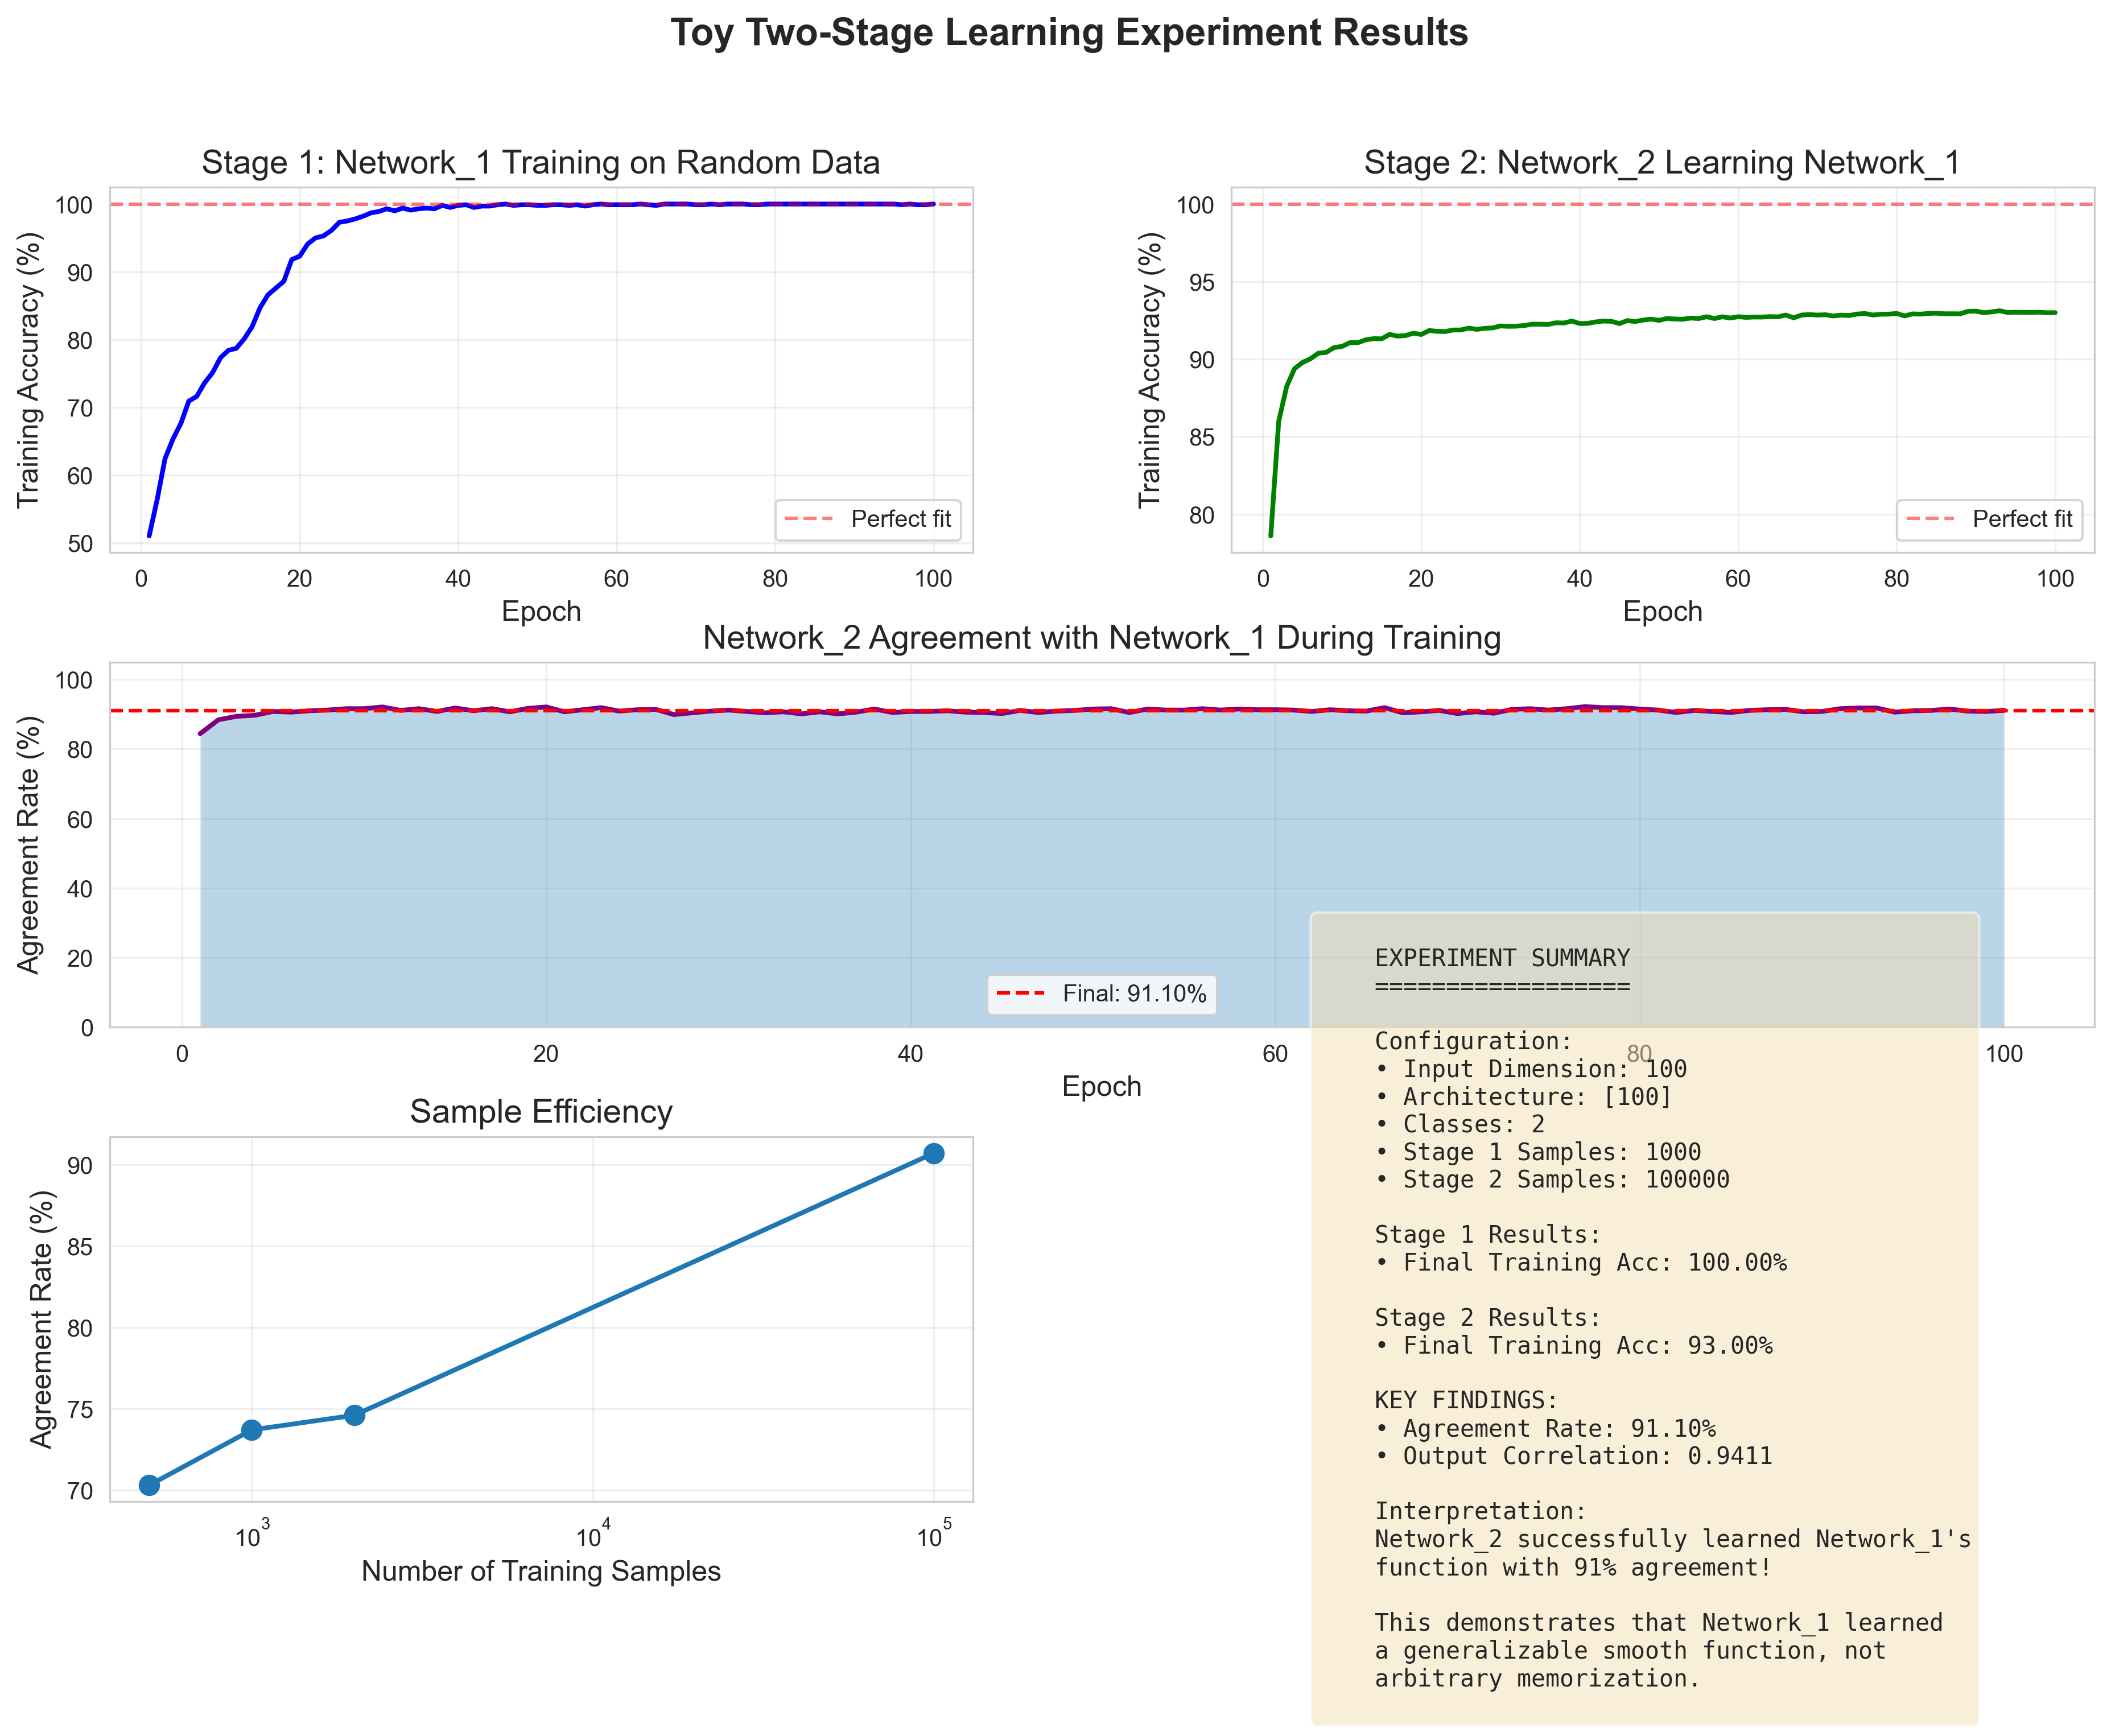

In [21]:
# Plot comprehensive results
plot_toy_results(results)


## Key Findings

Print out the key metrics from the experiment.


In [22]:
print("="*70)
print("KEY FINDINGS")
print("="*70)
print(f"\nStage 1 (Network_1 trained on random data):")
print(f"  Final training accuracy: {results['stage1_history']['train_acc'][-1]:.2f}%")

print(f"\nStage 2 (Network_2 learning Network_1's function):")
print(f"  Final training accuracy: {results['stage2_history']['train_acc'][-1]:.2f}%")

print(f"\nGeneralization to Network_1:")
print(f"  Agreement rate: {results['final_agreement']:.2f}%")
print(f"  Output correlation: {results['output_correlation']:.4f}")

print(f"\nSample Efficiency:")
for n, acc in zip(results['sample_efficiency']['sample_sizes'], 
                  results['sample_efficiency']['accuracies']):
    print(f"  {n:5d} samples -> {acc:.2f}% agreement")

print("\n" + "="*70)
print("INTERPRETATION")
print("="*70)
print(f"""
Network_2 achieved {results['final_agreement']:.0f}% agreement with Network_1!

This demonstrates that Network_1 did NOT just memorize arbitrarily.
Instead, it learned a smooth, generalizable function that Network_2
could efficiently learn from.

Key insight: Even when trained on completely random data, neural 
networks exhibit a strong inductive bias toward learnable, smooth 
functions rather than arbitrary memorization.
""")


KEY FINDINGS

Stage 1 (Network_1 trained on random data):
  Final training accuracy: 100.00%

Stage 2 (Network_2 learning Network_1's function):
  Final training accuracy: 93.00%

Generalization to Network_1:
  Agreement rate: 91.10%
  Output correlation: 0.9411

Sample Efficiency:
    500 samples -> 70.30% agreement
   1000 samples -> 73.70% agreement
   2000 samples -> 74.60% agreement
  100000 samples -> 90.70% agreement

INTERPRETATION

Network_2 achieved 91% agreement with Network_1!

This demonstrates that Network_1 did NOT just memorize arbitrarily.
Instead, it learned a smooth, generalizable function that Network_2
could efficiently learn from.

Key insight: Even when trained on completely random data, neural 
networks exhibit a strong inductive bias toward learnable, smooth 
functions rather than arbitrary memorization.



## Custom Experiments

Try different configurations to explore the effect of various parameters.


In [5]:
# Example: Test with different input dimensions
input_dims = [50, 100, 200]
results_comparison = {}

for dim in input_dims:
    print(f"\nTesting with input_dim={dim}...")
    res = run_toy_two_stage_experiment(
        input_dim=dim,
        hidden_sizes=[256, 128, 64],
        n_classes=10,
        stage1_samples=3000,
        stage2_samples=3000,
        test_samples=500,
        epochs_stage1=30,
        epochs_stage2=30,
        seed=42,
        verbose=False
    )
    results_comparison[dim] = res['final_agreement']
    print(f"  Agreement: {res['final_agreement']:.2f}%")



Testing with input_dim=50...
CUDA not available, using CPU
  Agreement: 35.60%

Testing with input_dim=100...
CUDA not available, using CPU
  Agreement: 27.20%

Testing with input_dim=200...
CUDA not available, using CPU
  Agreement: 37.00%


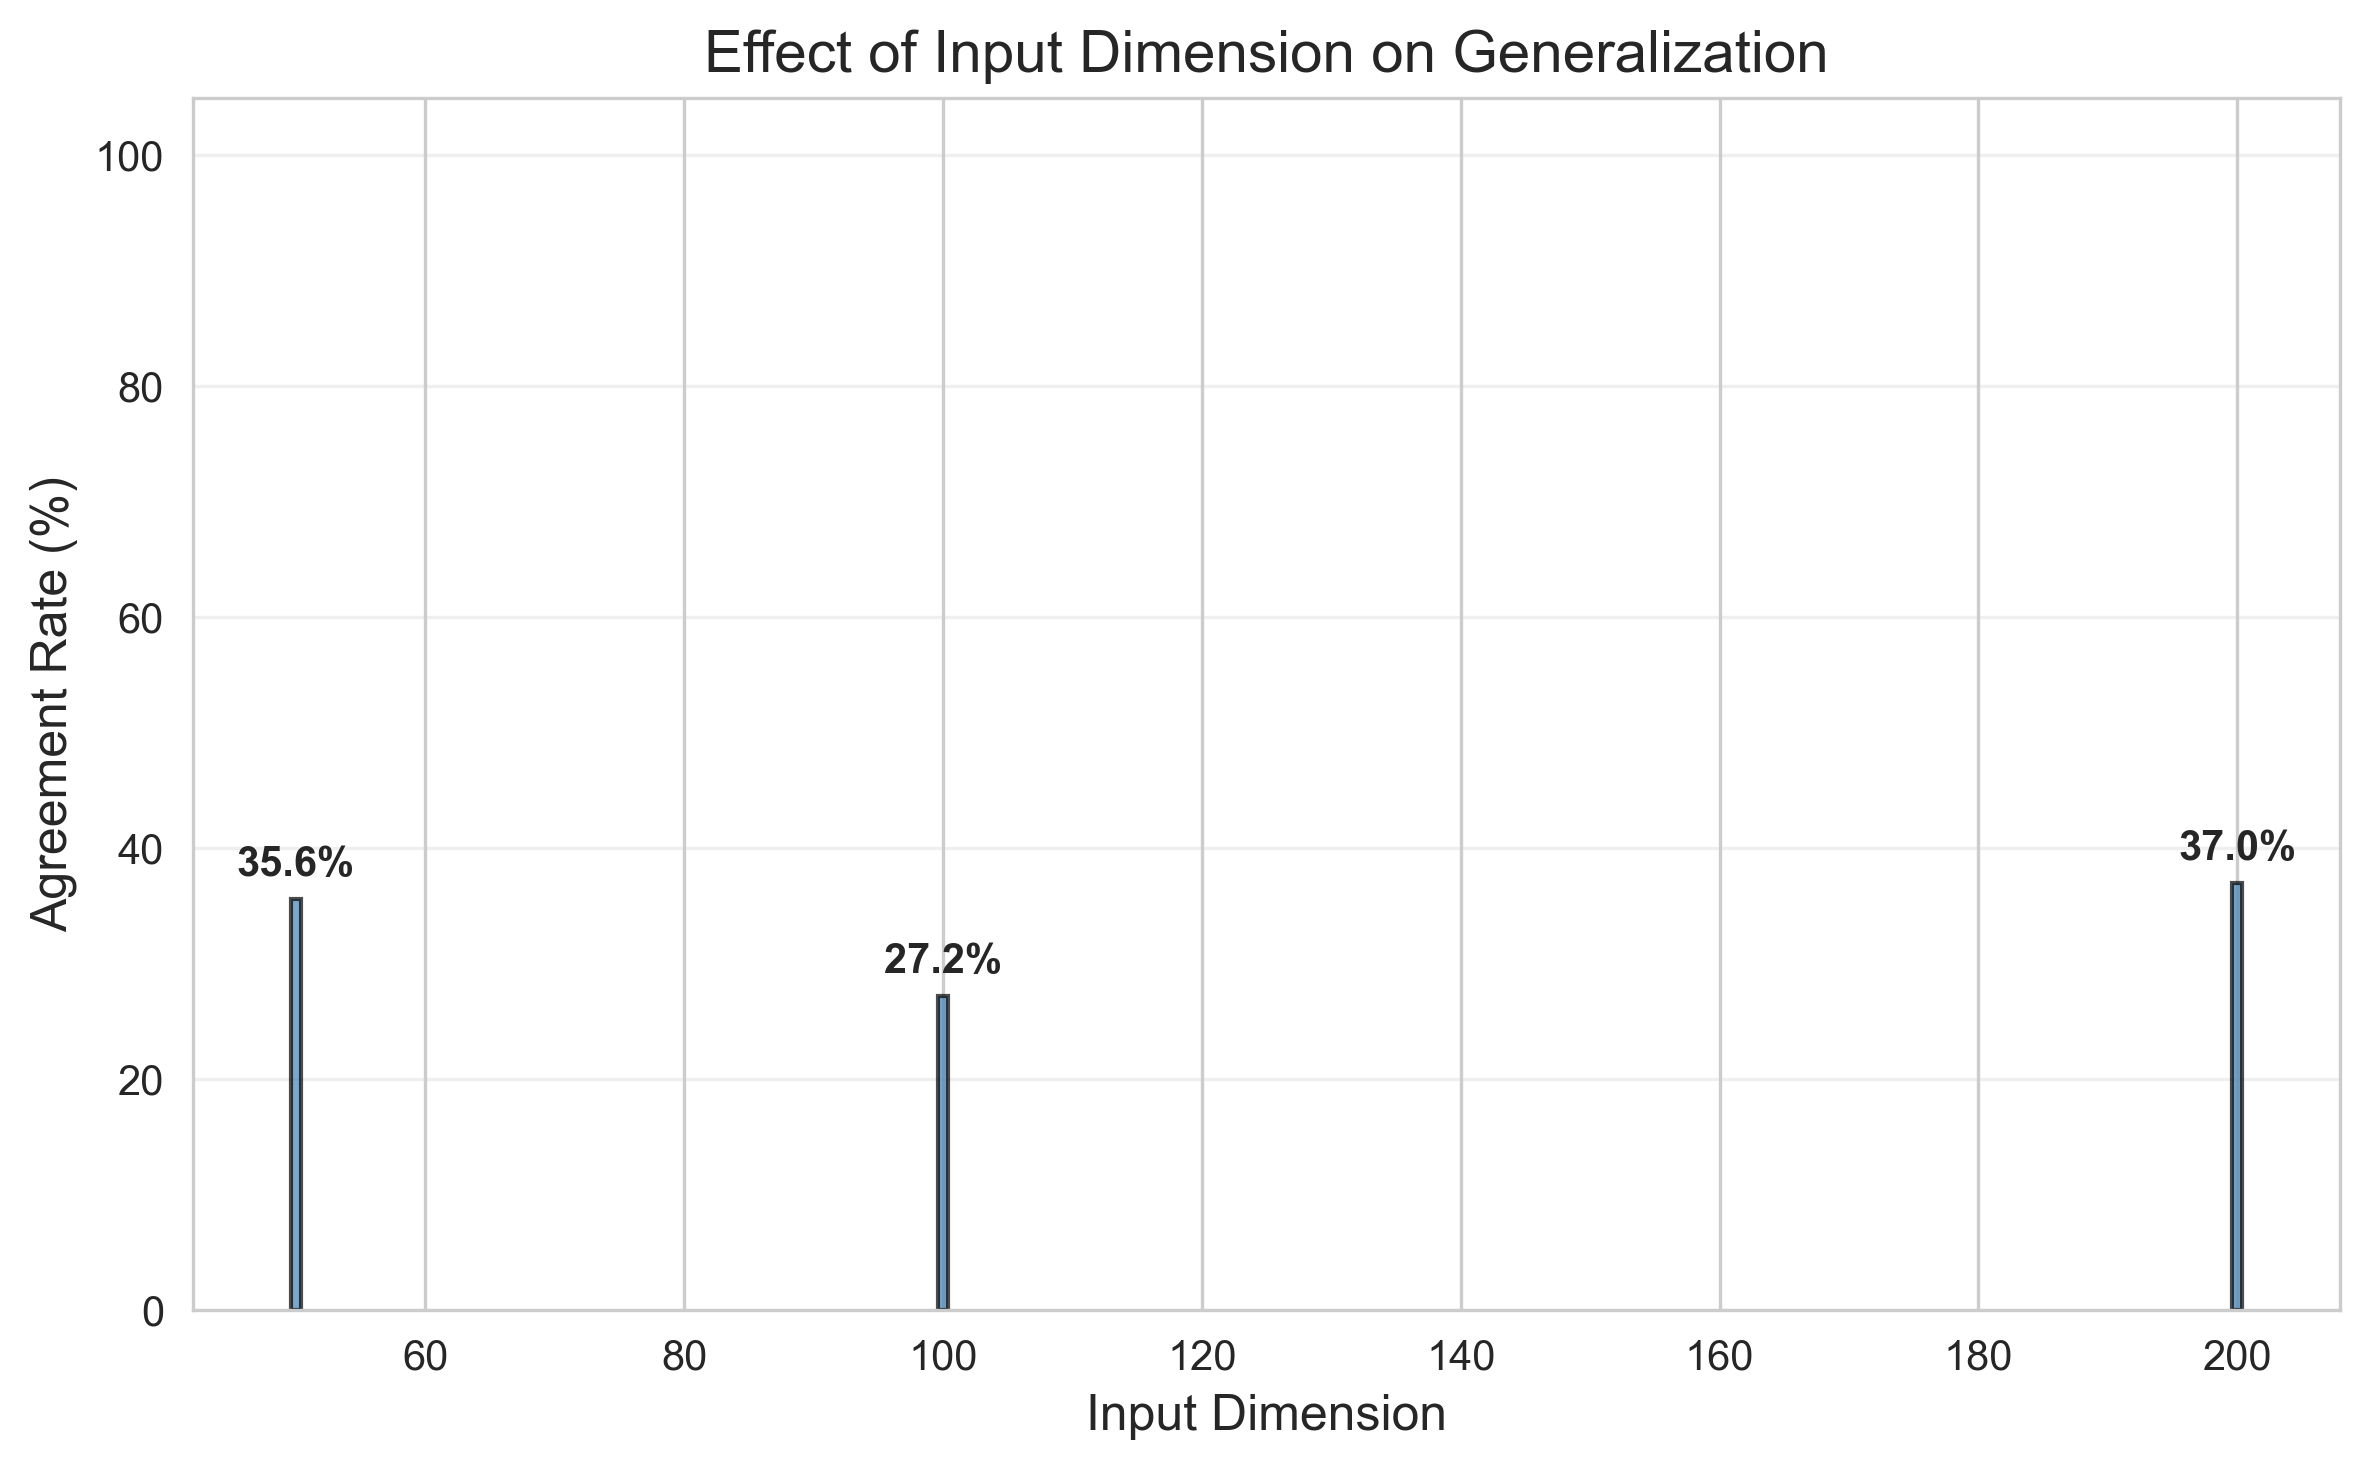

In [6]:
# Visualize comparison
plt.figure(figsize=(8, 5))
dims = list(results_comparison.keys())
agreements = list(results_comparison.values())

plt.bar(dims, agreements, color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Input Dimension')
plt.ylabel('Agreement Rate (%)')
plt.title('Effect of Input Dimension on Generalization')
plt.ylim([0, 105])
plt.grid(True, alpha=0.3, axis='y')

for dim, agreement in zip(dims, agreements):
    plt.text(dim, agreement + 2, f'{agreement:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Save Results (Optional)

Save the results and figures for later analysis.


In [ ]:
import pickle
from pathlib import Path

# Uncomment to save
# save_dir = Path('../results/toy_experiments')
# save_dir.mkdir(parents=True, exist_ok=True)

# with open(save_dir / 'toy_two_stage_results.pkl', 'wb') as f:
#     pickle.dump(results, f)

# plot_toy_results(results, save_path=str(save_dir / 'toy_two_stage_figure.png'))

print("Uncomment the code above to save results and figures.")
